In [2]:
#Importo las librerias necesarias para poder trabajar en el EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importo los 4 datasets con los que voy a trabajar asignandoles un nombre para diferenciarlos

df_dic_24 = pd.read_csv("datasets/listings_dic_24.csv")
df_mar_25 = pd.read_csv("datasets/listings_mar_25.csv")
df_jun_25 = pd.read_csv("datasets/listings_jun_25.csv")
df_sep_25 = pd.read_csv("datasets/listings_sep_25.csv")

In [4]:
print(df_dic_24.info())
print(df_mar_25.info())
print(df_jun_25.info())
print(df_sep_25.info())

# A pesar de que los datasets están obtenidos de la misma fuente de datos los reviso para ver como estan estructurados y si existen diferencias entre ellos 
# Al primer dataset (df_dic_24) le faltan 4 columnas respecto al resto, estas son: "estimated_revenue_l365d", "estimated_occupancy_l365d", "availability_eoy", "number_of_reviews_ly"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8699 entries, 0 to 8698
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8699 non-null   int64  
 1   listing_url                                   8699 non-null   object 
 2   scrape_id                                     8699 non-null   int64  
 3   last_scraped                                  8699 non-null   object 
 4   source                                        8699 non-null   object 
 5   name                                          8699 non-null   object 
 6   description                                   8446 non-null   object 
 7   neighborhood_overview                         4035 non-null   object 
 8   picture_url                                   8699 non-null   object 
 9   host_id                                       8699 non-null   i

In [5]:
# Compruebo que indican las columnas que tengo para ver que clase de datos me faltan

df_mar_25[["estimated_revenue_l365d", "estimated_occupancy_l365d", "availability_eoy", "number_of_reviews_ly"]]

# Para mi estudio estas columnas no son relevantes por lo que puedo prescindir de ellas

,estimated_revenue_l365d,estimated_occupancy_l365d,availability_eoy,number_of_reviews_ly
0,4290.0,30,4,5
1,13080.0,120,180,17
2,10560.0,88,172,14
3,7848.0,72,172,12
4,28140.0,210,243,24
...,...,...,...,...
8842,33264.0,216,233,35
8843,41820.0,255,223,77
8844,14280.0,168,39,33
8845,69368.0,184,237,24


In [6]:
# Voy revisando una a una las columnas para ver que datos me muestran y eligo con cuales me interesa trabajar para demostrar o desmentir mis hipotesis

df_dic_24.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [7]:
print(df_dic_24["id"].nunique())
print(len(df_dic_24["id"]))

# id es una columna que me interesa ya que es la referencia unica a cada alojamiento, esto me puede servir para analizar la evolución del precio de los mismos alojamientos

print(df_dic_24["price"][df_dic_24["id"] == 137143])
print(df_mar_25["price"][df_mar_25["id"] == 137143])

# Como he comprobado tanto en el dataset de dicimbre del 2024 como en el de marzo de 2025 existe el alojamiento con el mismo ID 
# Por tanto y como es lógico la columna price será imprescindible para poder trabajar con los datos 

8699
8699
1    $390.00
Name: price, dtype: object
1449    $390.00
Name: price, dtype: object


In [8]:
# host_id me interesa para identificar y relacionar los alojamientos con los propietarios de estos, es decir, puedo ver el numero de alojamientos por propietario

print(df_dic_24["host_id"].nunique())

# Como se puede ver en el dataset de diciembre hay 4014 propietarios 

print(df_dic_24["host_id"].value_counts())

# También podemos observar que la distribución de propiedades es desigual por lo que podemos seguir con nuestra hipótesis

len(df_mar_25[df_mar_25["host_id"] == 211991268])

# También podemos observar que para la misma referencia de host_id los dos datasets existen, además aquí vemos que el propietario 211991268 pasa de tener
# 79 alojamientos en diciembre del 2024 a 72 en marzo del 2025, por lo que nos dice almenos en este caso que el numero de propiedades es cambiante
# Esto claramente es un indicio de que es un propietario profesionalizado y nos da pie a ver la variabilidad entre diferentes grupos de propietarios para ver
# de que forma se distribuye el mercado de los alojamientos turisticos y cual es su dinámica


4014
host_id
134221412    196
417948112    147
83066665     115
211991268     79
123160301     69
            ... 
187136654      1
665181153      1
665038937      1
665000938      1
664597095      1
Name: count, Length: 4014, dtype: int64


72

In [9]:
# Para el estudio es imprecindible saber el número de propiedades que tiene cada propietario, para ello tenemos varias columnas que parecen indicarnoslo

df_dic_24[["host_listings_count","host_total_listings_count", "calculated_host_listings_count", "host_url"]]

# Host_listings_count nos muestra el numero total de alojamientos totales (fuera y dentro de València) que tienen los propietarios
# Para ello he utilizado la url del host que se encuentra en la columna host_url, y he accedido al perfil de Airbnb en el que nos muestra ese dato

# Por otro lado, calculated_host_listings_count refleja los alojamientos activos dentro de València, por lo que es la variable más interesante para el estudio en la ciudad.
# Nos permite saber con exactitud cuántos pisos tiene cada propietario publicados en València, y también nos ayuda a
# entender el grado de profesionalización: los hosts con muchos alojamientos en València suelen tener también más pisos fuera de la ciudad,
# mientras que los que tienen pocos pisos en València, normalmente no tendrán alojamientos fuera de la ciudad.

# Para poder comparar mas facilmente la evolución de las las mismas características de los DataFrames y  descubrir que es host_total_listings_count
# voy a crear un único DataFrame en el que se agrupen todos los datos que necesito evaluar

idhost = 134221412 

comprobacion_host_total_dic_24 = df_dic_24[df_dic_24["host_id"] == idhost].head(1)
comprobacion_host_total_mar_25 = df_mar_25[df_mar_25["host_id"] == idhost].head(1)
comprobacion_host_total_jun_25 = df_jun_25[df_jun_25["host_id"] == idhost].head(1)
comprobacion_host_total_sep_25 = df_sep_25[df_sep_25["host_id"] == idhost].head(1)

comprobacion_host_total = pd.concat([comprobacion_host_total_dic_24, comprobacion_host_total_mar_25, comprobacion_host_total_jun_25, comprobacion_host_total_sep_25], ignore_index=True)

comprobacion_host_total[["host_listings_count", "host_total_listings_count", "calculated_host_listings_count", "host_url"]]

# La columna host_total_listings_count indica el número total de alojamientos que tiene un propietario asociados a su perfil en Airbnb,
# incluyendo tanto los activos como los inactivos o pausados, es decir, todos los alojamientos visibles en la plataforma a fecha del dataset.
# Comparando diferentes propietarios he visto que esta cifra puede aumentar o disminuir, por lo que no refleja un histórico acumulado como pensaba al principio,
# sino un conteo puntual de la cuenta del propietario. 

# Este dato es muy útil para conocer la escala de operación de los multipropietarios frente a los propietarios únicos o de pocos alojamientos,
# ya que permite identificar a aquellos hosts que gestionan muchos anuncios en la plataforma aunque no todos estén activos, es decir tienen mayor influencia en el mercado.



,host_listings_count,host_total_listings_count,calculated_host_listings_count,host_url
0,205.0,254.0,196,https://www.airbnb.com/users/show/134221412
1,76.0,127.0,68,https://www.airbnb.com/users/show/134221412
2,78.0,133.0,77,https://www.airbnb.com/users/show/134221412
3,78.0,135.0,77,https://www.airbnb.com/users/show/134221412


In [10]:
# Para ver que columna me puede servir para ver a que barrio pertenece cada alojamiento,
# he visto la columna mas completa (con mas datos no nulos) y homogenea es neighbourhood_group_celansed
# Por lo que se utilizara esta columna para comparar precios entre barrios y ver la concentracion de alojamientos por barrio

print(df_dic_24["neighbourhood"].value_counts()) # Muchos valores nulos y sin agrupacion por barrios util
print(df_dic_24["neighbourhood_cleansed"].value_counts()) #Hay muchos barrios por lo que es mas complicado explicar los datos, en cambio es mas facil por distritos
print(df_dic_24["neighbourhood_group_cleansed"].dropna()) #No descarta valores no nulos ya que no tiene, al contrario de lo que pasaba en otra columnas de neighbourhood
print(df_dic_24["neighbourhood_group_cleansed"].unique()) #Como agrupa los barrios por distritos es mas facil explicar los datos, 
# para un analisis mas detallado seria mejor utilizar la columna neighbourhood_cleansed
print(df_dic_24["neighbourhood_group_cleansed"].nunique())

neighbourhood
València, Comunidad Valenciana, Spain                                3475
Valencia, Comunidad Valenciana, Spain                                 280
Valencia, Valencian Community, Spain                                  128
Valencia, Spain                                                        56
Valencia / València, Spain                                             40
El Perellonet, Comunidad Valenciana, Spain                             14
València, Spain                                                         9
València, Co, Spain                                                     3
València, Valencia, Spain                                               3
València, Comunidad Valenciana, ES, Valencia, Spain                     2
Valencia, Valenciana, Spain                                             1
València, Valencian Community, Spain                                    1
Benetússer, Comunidad Valenciana, Spain                                 1
Valencia, 46, Spain     

In [11]:
# Para conocer que tipo de alojamiento escada alojamiento utilizaremos la variable room_type
print(df_dic_24["room_type"].value_counts())
len(df_dic_24)


room_type
Entire home/apt    6379
Private room       2304
Hotel room           11
Shared room           5
Name: count, dtype: int64


8699

In [12]:
print(df_dic_24["price"])
# La columna price (precio) esesencial para trabajar la hipótesis, pero tenemos que limpiarla y transformarla para poder operar con ella 


0       $150.00
1       $390.00
2       $204.00
3       $132.00
4        $48.00
         ...   
8694    $146.00
8695    $142.00
8696     $81.00
8697     $42.00
8698    $152.00
Name: price, Length: 8699, dtype: object


In [13]:
print(df_dic_24["price"].unique())

# Puedo ver que hay todo tipo de precios, y también que la columna es de clase objeto, mientras que nosotros necesitamos que sea de lase float para poder operar
# Por lo tanto voy a crear una nueva columna llamada precio que sea tipo float

df_dic_24["precio"] = df_dic_24["price"].str.replace("$", "").str.replace(",","").astype(float)
df_mar_25["precio"] = df_mar_25["price"].str.replace("$", "").str.replace(",","").astype(float)
df_jun_25["precio"] = df_jun_25["price"].str.replace("$", "").str.replace(",","").astype(float)
df_sep_25["precio"] = df_sep_25["price"].str.replace("$", "").str.replace(",","").astype(float)

['$150.00' '$390.00' '$204.00' '$132.00' '$48.00' '$217.00' '$125.00'
 '$49.00' '$44.00' '$200.00' '$263.00' '$33.00' '$90.00' '$490.00'
 '$38.00' '$80.00' '$105.00' nan '$70.00' '$130.00' '$75.00' '$113.00'
 '$114.00' '$60.00' '$94.00' '$30.00' '$159.00' '$164.00' '$29.00'
 '$191.00' '$71.00' '$91.00' '$121.00' '$177.00' '$214.00' '$357.00'
 '$35.00' '$129.00' '$261.00' '$61.00' '$122.00' '$57.00' '$66.00'
 '$85.00' '$63.00' '$86.00' '$25.00' '$53.00' '$95.00' '$40.00' '$139.00'
 '$199.00' '$9,499.00' '$120.00' '$84.00' '$305.00' '$107.00' '$116.00'
 '$104.00' '$160.00' '$77.00' '$124.00' '$82.00' '$186.00' '$108.00'
 '$97.00' '$106.00' '$93.00' '$32.00' '$76.00' '$136.00' '$211.00'
 '$134.00' '$101.00' '$146.00' '$26.00' '$47.00' '$89.00' '$135.00'
 '$73.00' '$109.00' '$42.00' '$67.00' '$115.00' '$119.00' '$103.00'
 '$111.00' '$250.00' '$155.00' '$92.00' '$39.00' '$225.00' '$142.00'
 '$68.00' '$87.00' '$37.00' '$50.00' '$31.00' '$140.00' '$51.00' '$100.00'
 '$138.00' '$220.00' '$110.

In [14]:
print(len(df_dic_24[df_dic_24["price"].isna()]),
len(df_mar_25[df_mar_25["price"].isna()]),
len(df_jun_25[df_jun_25["price"].isna()]),
len(df_jun_25[df_jun_25["price"].isna()]))

# En los diferentes datasets hay muchos alojamientos que no tienen precio, por lo que habrá que eliminarlos en el momento de operar para que no distorsione los resultados
# Por ahora no lo voy a hacer hasta que no empieze a operar con los datos ya que necesito tener la máxima información disponible de otras columnas

578 689 804 804


In [15]:
# Para mostrar la situación actual de los alojamientos de Airbnb en Valencia voy a utilizar el último dataset disponible, de modo que la información sea la mas actual

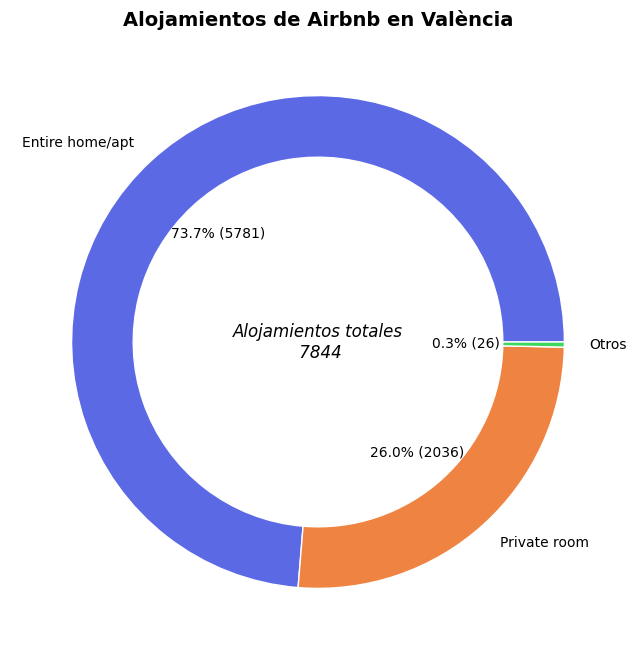

In [16]:
#Gráfico de alojamientos por tipos

tipos_alojamiento = df_sep_25["room_type"].value_counts()
tipos_alojamiento["Otros"] = tipos_alojamiento.get("Shared room", 0) + tipos_alojamiento.get("Hotel room", 0)
tipos_alojamiento = tipos_alojamiento.drop(["Shared room", "Hotel room"], errors="ignore")

fig, ax = plt.subplots(figsize= (8,8))

ax.pie(tipos_alojamiento.values,
       labels=tipos_alojamiento.index,
       wedgeprops={'edgecolor': 'white', "width":0.25},
       autopct=lambda pct: f"{pct:.1f}% ({int(pct/100.*sum(tipos_alojamiento.values))})",
       textprops={'fontsize': 10},
       colors = ["#5C69E5", "#EF8442", "#3DD65E"])

ax.text(0, 0, f'Alojamientos totales\n {len(df_sep_25)}', ha='center', va='center', fontsize=12, style="italic")

plt.title("Alojamientos de Airbnb en València", fontsize=14, fontweight='bold')

plt.show()

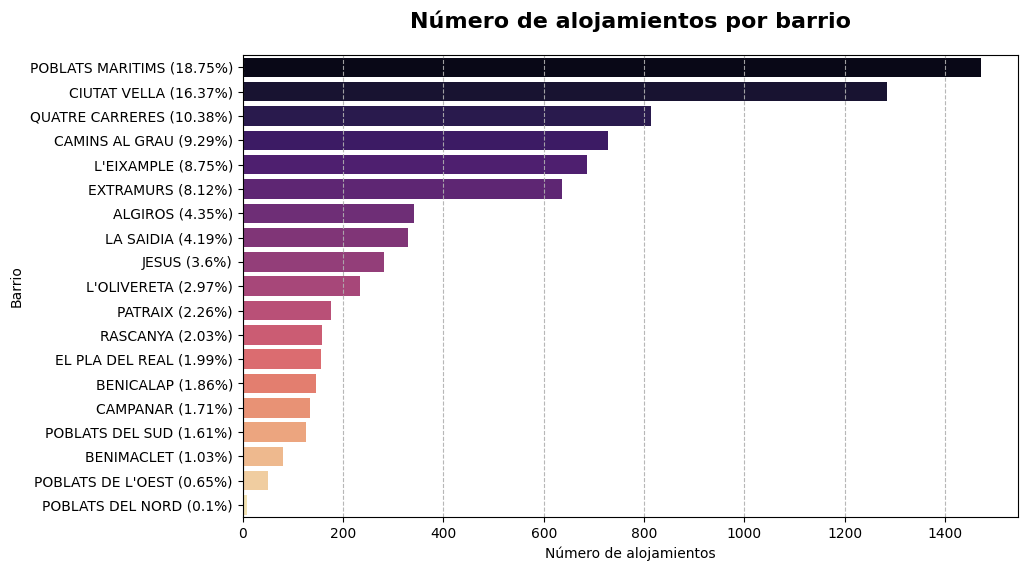

In [17]:
#Gráfico de alojamientos por barrio

alojamientos_barrio = df_sep_25["neighbourhood_group_cleansed"].value_counts().reset_index()
alojamientos_barrio.columns = ["Barrio", "Alojamientos por barrio"]

total_alojamientos_sep_25 = alojamientos_barrio["Alojamientos por barrio"].sum()
alojamientos_barrio["Porcentaje"] = (alojamientos_barrio["Alojamientos por barrio"] / total_alojamientos_sep_25 * 100).round(2)
alojamientos_barrio["Barrio_y_porcentaje"] = alojamientos_barrio.apply(lambda row: f"{row['Barrio']} ({row['Porcentaje']}%)", axis=1)

plt.figure(figsize=(10,6))
sns.barplot(
    data= alojamientos_barrio,
    x="Alojamientos por barrio",
    y="Barrio_y_porcentaje",
    palette="magma",
    hue="Barrio_y_porcentaje"
)

plt.title("Número de alojamientos por barrio", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Número de alojamientos")
plt.ylabel("Barrio")
plt.grid(axis='x', linestyle='--', alpha=0.9)
plt.show()

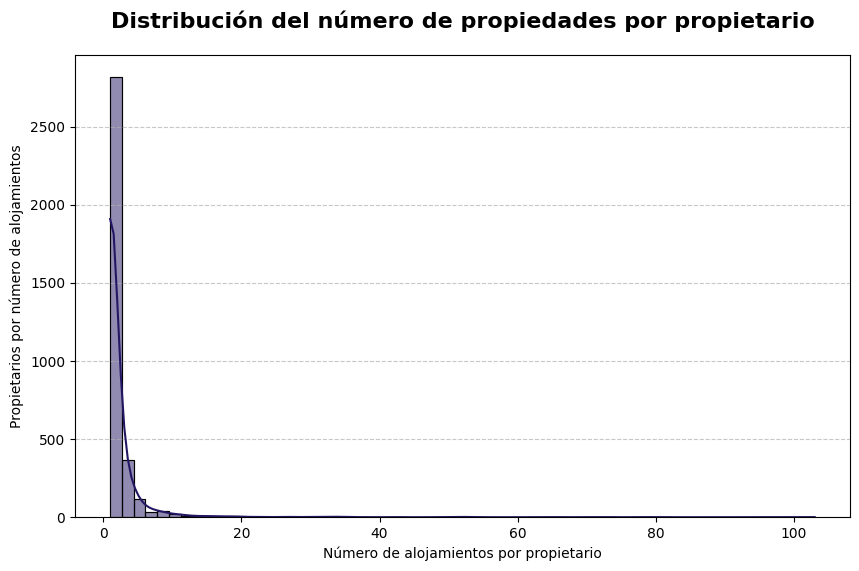

In [18]:
# Gáfico de distribución de propietarios 

alojamientos_por_propietario = df_sep_25[["host_id", "calculated_host_listings_count"]].drop_duplicates()

plt.figure(figsize=(10,6))
sns.histplot(
    alojamientos_por_propietario["calculated_host_listings_count"],
    bins=60,
    kde=True,
    color="#251664",
)
plt.title("Distribución del número de propiedades por propietario", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Número de alojamientos por propietario")
plt.ylabel("Propietarios por número de alojamientos")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

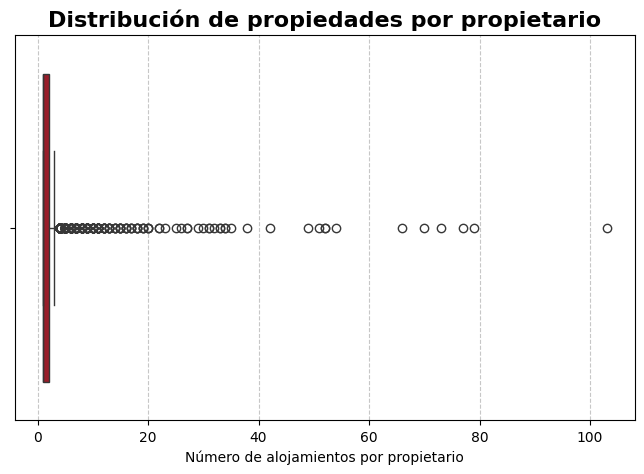

In [19]:
# Gráfico de caja de la distribución del tamaño de los propietarios

plt.figure(figsize=(8,5))
sns.boxplot(
    x=alojamientos_por_propietario["calculated_host_listings_count"],
    color="#AE0919"
)
plt.xlabel("Número de alojamientos por propietario")
plt.title("Distribución de propiedades por propietario", fontsize=16, fontweight="bold")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

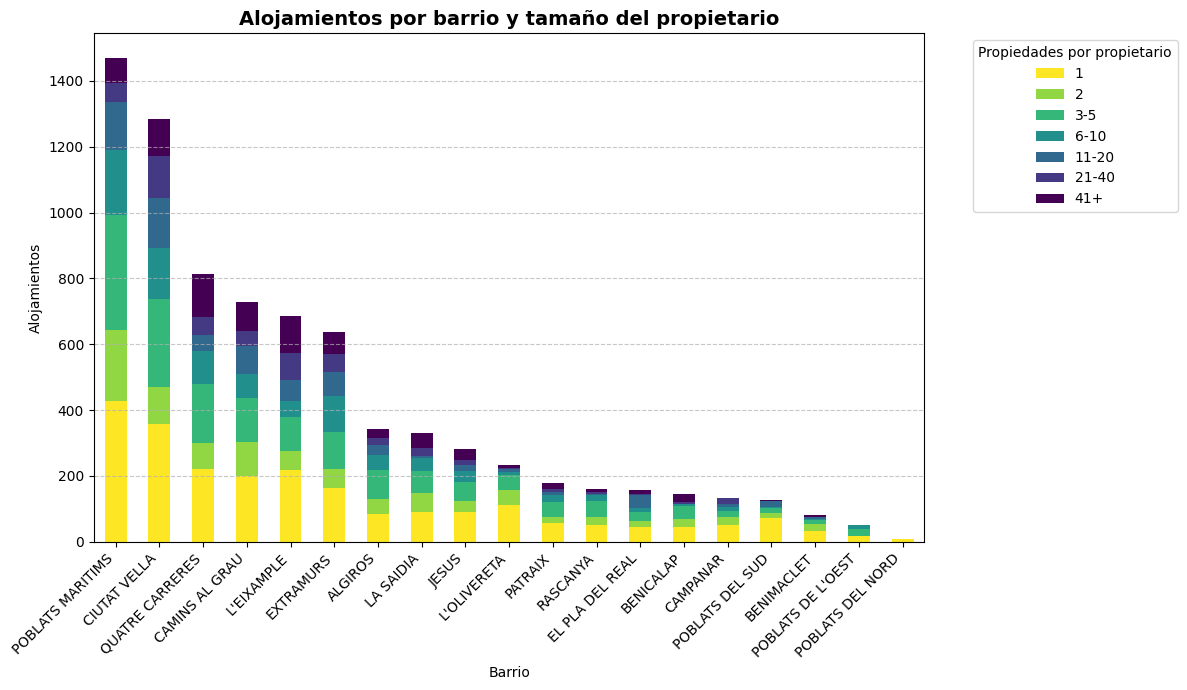

In [29]:
# Es interesante cononcer también como se distribuye por barrio la propiedad de los alojamientos, es decir que tamaño de propietarios tienen alojamientos en cada barrio

bins = [0, 1, 2, 5, 10, 20, 40, float("inf")]
labels = ["1", "2", "3-5", "6-10", "11-20", "21-40", "41+"]

df_sep_25["rango"] = pd.cut(
    df_sep_25["calculated_host_listings_count"],
    bins=bins,
    labels=labels,
    right=True)

tabla = pd.crosstab(
    df_sep_25["neighbourhood_group_cleansed"],
    df_sep_25["rango"])

tabla = tabla.loc[tabla.sum(axis=1).sort_values(ascending=False).index]


ax = tabla.plot(
    kind="bar",
    stacked=True,
    figsize=(12,7),
    colormap="viridis_r")

ax.set_ylabel("Alojamientos")
ax.set_xlabel("Barrio")
ax.set_title("Alojamientos por barrio y tamaño del propietario", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(title="Propiedades por propietario", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [21]:
# Para ver la evolución necesitaré trabajar con el todos los datasets por lo que voy a crear un DataFrame único
# Como hay alojamientos repetidos, también hay valores repetidos en las mismas columnas, por lo tanto y para poder diferenciar y tener claro
# en que momento hay tales caracteristicas, voy a crear una columna que se llame fecha

df_dic_24["fecha"] = "dic_24"
df_mar_25["fecha"] = "mar_25"
df_jun_25["fecha"] = "jun_25"
df_sep_25["fecha"] = "sep_25"

df_Airbnb= pd.concat([df_dic_24, df_mar_25, df_jun_25, df_sep_25], ignore_index=True)

orden_fechas = ["dic_24", "mar_25", "jun_25", "sep_25"]
df_Airbnb['fecha'] = pd.Categorical(df_Airbnb['fecha'], categories=orden_fechas, ordered=True)

C:\Users\Albert\AppData\Local\Temp\ipykernel_49244\2239036372.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_resumen_total = alojamientos_por_propietario.groupby(["fecha", "rango"], as_index=False).agg(
C:\Users\Albert\AppData\Local\Temp\ipykernel_49244\2239036372.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_resumen_total["porcentaje_propiedades"] = df_resumen_total.groupby("fecha")["propiedades"].transform(


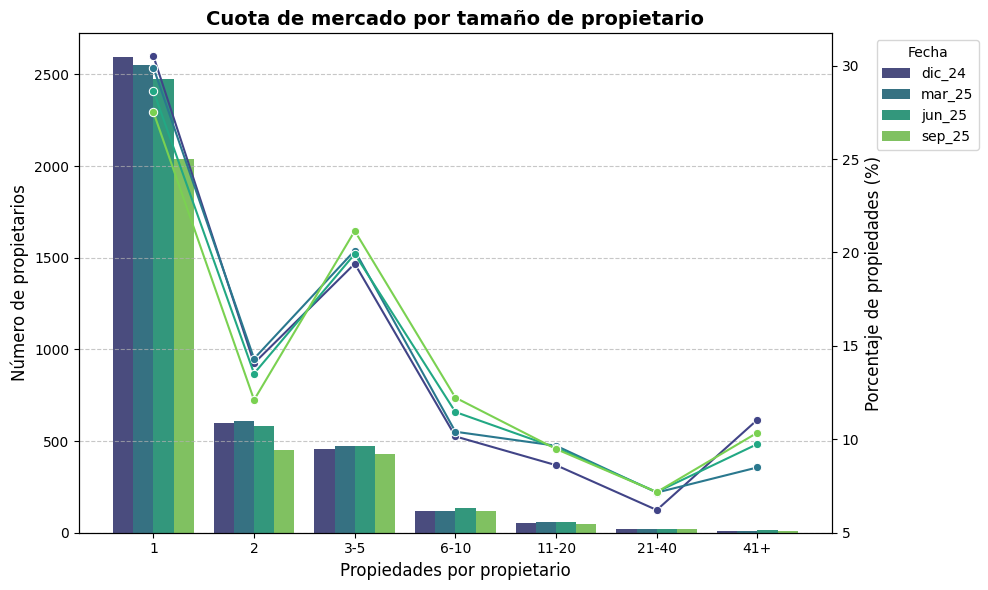

In [30]:
# Para poder ver como se distribuyen las propiedades durante los periodos disponibles entre propietarios por cantidad de propiedades
# Voy a establecer unos rangos que me serviran para poder visualizar los diferentes tipos de propietarios
# Desde uni propietarios y multipropietarios pequeños pasando por multipropetarios medianos hasta multipropietarios grandes
# Voy probando diferentes rangos para poder identificar cuales son mas útiles para ver la dínamica

# Para ello voy a crear un gráfico en el que las barras sean el numero de propietarios que hay por rango,
# y las lineas marquen la evolución de concentración de alojamientos que hay entre distintos rangos
# De esta forma se puede analizar la tendencia y la distribución de los alojamientos que hay en Airbnb.

bins = [0, 1, 2, 5, 10, 20, 40, float("inf")]
labels = ["1", "2", "3-5", "6-10", "11-20", "21-40", "41+"]

alojamientos_por_propietario = df_Airbnb[["fecha", "host_id", "calculated_host_listings_count"]].drop_duplicates()

alojamientos_por_propietario["rango"] = pd.cut(alojamientos_por_propietario["calculated_host_listings_count"],
    bins=bins,
    labels=labels,
    right=True)

df_resumen_total = alojamientos_por_propietario.groupby(["fecha", "rango"], as_index=False).agg(
    propietarios=("host_id", "count"),
    propiedades=("calculated_host_listings_count", "sum"))

df_resumen_total["porcentaje_propiedades"] = df_resumen_total.groupby("fecha")["propiedades"].transform(
    lambda x: (x / x.sum()) * 100)

fig, ax1 = plt.subplots(figsize=(10,6))

sns.barplot(data=df_resumen_total,
    x="rango",
    y="propietarios",
    hue="fecha",
    ax=ax1,
    palette="viridis")

ax1.set_ylabel("Número de propietarios", fontsize=12)
ax1.set_xlabel("Propiedades por propietario", fontsize=12)
ax1.set_title("Cuota de mercado por tamaño de propietario", fontsize=14, fontweight='bold')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

ax2 = ax1.twinx()

sns.lineplot(data=df_resumen_total,
    x="rango",
    y="porcentaje_propiedades",
    hue="fecha",
    marker="o",
    ax=ax2,
    legend=False,
    palette="viridis")

ax2.set_ylabel("Porcentaje de propiedades (%)", fontsize=12)

ax1.legend(title="Fecha", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

La gráfica muestra que el rango mayoritario de propietarios es el de los propietarios únicos, que además concentran alrededor del 30% de los alojamientos en la plataforma. Sin embargo, se observa que tanto el número de propietarios únicos como su cuota de mercado disminuyen progresivamente a lo largo de los periodos analizados. Esta tendencia indica una pérdida de peso relativo de los pequeños anfitriones dentro del mercado.

De forma similar, el número de propietarios con dos alojamientos también se reduce, junto con su cuota de mercado, lo que refuerza la idea de una consolidación progresiva del mercado hacia propietarios con más activos.

En contraste, los propietarios con entre 3 y 5 alojamientos mantienen estable su número, pero aumentan su cuota de mercado de manera notable, prácticamente duplicando la de los anfitriones con dos propiedades. Este grupo se consolida como el segundo segmento más relevante, y su crecimiento sugiere que empieza a tener mayor capacidad de influencia en la dinámica de precios. A diferencia de los unipropietarios, disponen de mayor flexibilidad operativa y margen de maniobra para ajustar sus estrategias.

El siguiente rango, correspondiente a los propietarios medianos (entre 6 y 10 alojamientos), también presenta una cuota de mercado en aumento, mientras que su número de anfitriones se mantiene estable respecto al inicio del periodo. Esto refuerza la idea de que estos actores están ganando peso sin necesidad de crecer en número, posiblemente debido a una gestión más profesionalizada y eficiente.

Por su parte, los rangos de 11 a 20 y 21 a 40 propiedades muestran una evolución más estable, tanto en número de propietarios como en cuota de mercado, aunque con una ligera tendencia al alza.

Finalmente, el grupo de propietarios con más de 40 alojamientos experimenta una leve caída entre diciembre de 2024 y marzo de 2025, posiblemente por ajustes empresariales o salida de algunos grandes operadores. No obstante, a partir de los siguientes periodos su cuota de mercado crece de forma constante, lo que sugiere que este segmento podría ganar una influencia creciente en el futuro cercano.

En conjunto, los datos apuntan hacia una concentración gradual del mercado: los pequeños anfitriones van perdiendo presencia, mientras que los propietarios con varias propiedades —especialmente entre 3 y 10 alojamientos— fortalecen su posición y capacidad de influencia sobre los precios.

In [23]:
# Como en los siguientes analisis vol a utilizar la columna precio, ya puedo eliminar las columnas que contengan valores no nulos
# Esto es util para no distorsionar los resultados

df_Airbnb = df_Airbnb[df_Airbnb["precio"].notna()].copy()

C:\Users\Albert\AppData\Local\Temp\ipykernel_49244\1063771977.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ids_por_fecha = df_Airbnb.groupby("fecha")["id"].apply(set)
C:\Users\Albert\AppData\Local\Temp\ipykernel_49244\1063771977.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  evolucion = (df_comunes.groupby(["fecha", "rango"], as_index=False)["precio"]


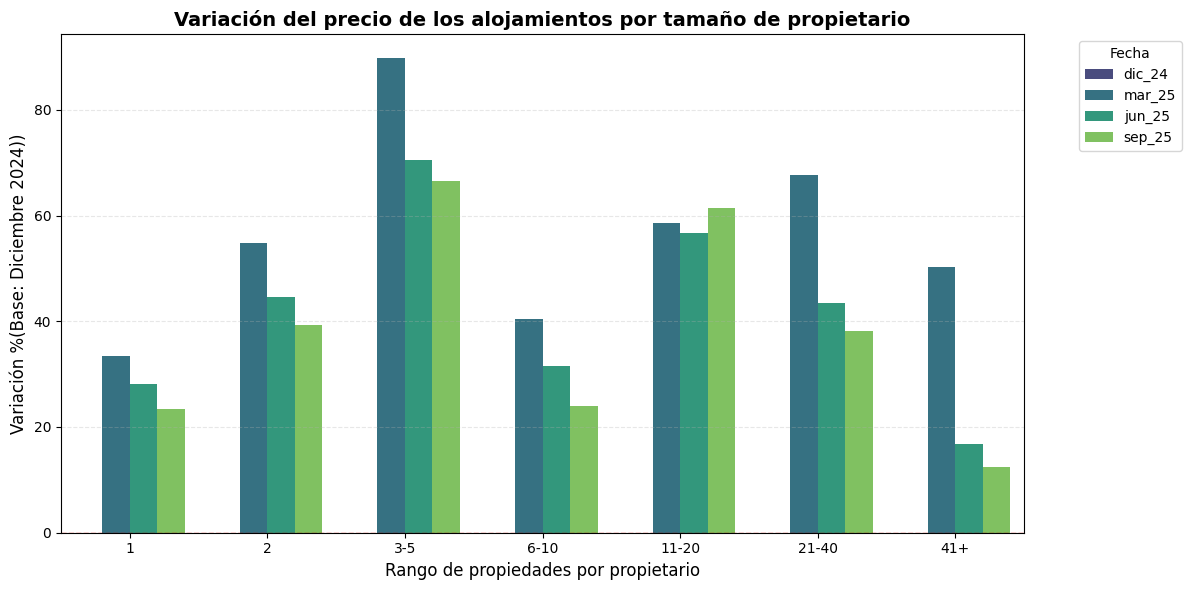

In [32]:
# Para poder ver la evolución del precio de los alojamientos por tipo de propietario, tengo que crear un grupo de estudio en el que solo 
# esten las viviendas que  esten publicadas en todas las fechas además la base debe ser los precios de diciembre de 2024 ya que se trata de la primera fecha

# Evolución porcentual de los precios de los alojamientos, los alojamientos comparados consigo mismos, promediado por rango de conentracion de alojamientos por propietario

bins = [0, 1, 2, 5, 10, 20, 40, float("inf")]
labels = ["1", "2", "3-5", "6-10", "11-20", "21-40", "41+"]

ids_por_fecha = df_Airbnb.groupby("fecha")["id"].apply(set)
ids_comunes = set.intersection(*ids_por_fecha.values)
df_comunes = df_Airbnb[df_Airbnb["id"].isin(ids_comunes)].copy()

df_comunes["rango"] = pd.cut(
    df_comunes["calculated_host_listings_count"],
    bins=bins,
    labels=labels,
    right=True)

evolucion = (df_comunes.groupby(["fecha", "rango"], as_index=False)["precio"]
             .mean()
             .rename(columns={"precio": "precio_promedio"}))

precio_base = evolucion[evolucion["fecha"] == "dic_24"][["rango", "precio_promedio"]]
precio_base = precio_base.rename(columns={"precio_promedio": "precio_base"})

evolucion = evolucion.merge(precio_base, on="rango", how="left")
evolucion["variacion_%"] = ((evolucion["precio_promedio"] - evolucion["precio_base"]) / 
                            evolucion["precio_base"] * 100)

evolucion_sin_base = evolucion[evolucion["fecha"] != "dic_24"]

plt.figure(figsize=(12, 6))
sns.barplot(
    data=evolucion_sin_base,
    x="rango",
    y="variacion_%",
    hue="fecha",
    palette="viridis")

plt.axhline(y=0, color="red", linestyle="--", linewidth=1, alpha=0.7)
plt.ylabel("Variación %(Base: Diciembre 2024))", fontsize=12)
plt.xlabel("Rango de propiedades por propietario", fontsize=12)
plt.title("Variación del precio de los alojamientos por tamaño de propietario", fontsize=14, fontweight="bold")
plt.legend(title="Fecha", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

Los datos muestran que todos los tipos de propietarios han aumentado el precio medio de sus alojamientos, aunque el comportamiento varía según el tamaño del propietario. Este incremento general puede explicarse en parte por factores turísticos y de estacionalidad, ya que durante los meses cercanos a Fallas o al verano los precios tienden a subir, mientras que en los meses próximos al invierno suelen bajar.

En cuanto al tamaño del propietario, se observan patrones distintos. Los propietarios únicos —aquellos con una sola vivienda— son los que menos aumentan sus precios. Esto tiene sentido, ya que suelen operar de forma más individual y poco profesionalizada, sin herramientas de gestión dinámica de precios. Además, al tener un poder de mercado muy limitado, su capacidad para influir en los precios es reducida.

Por otro lado, los propietarios con entre 3 y 5 alojamientos muestran una mayor variabilidad y ajuste en los precios. Esto sugiere un nivel de profesionalización más alto: probablemente aplican estrategias de revenue management o de fijación dinámica de precios en función de la demanda, la ocupación y la competencia.

Sin embargo, el resto de propietarios —especialmente los de mayor tamaño— no aumentan los precios en proporción directa a su poder de mercado. Es decir, poseer más propiedades no implica necesariamente cobrar precios mucho más altos. A partir de cierto punto, el objetivo puede pasar de maximizar el precio por noche a optimizar la ocupación o los ingresos totales.

En conjunto, los resultados indican que a partir de un número intermedio de propiedades (entre 3 y 5) los propietarios tienden a establecer precios más altos y flexibles, pero el crecimiento del precio no es lineal respecto al tamaño del propietario. Esto refleja un mercado de competencia monopolística, donde existe margen para la diferenciación y la fijación individual de precios, pero sin llegar a un poder de mercado dominante.